# Plots for paper

In [1]:
%matplotlib inline
import gc
%config InlineBackend.figure_format = 'retina'
from matplotlib.pylab import *
import matplotlib.pyplot as plt 
rcParams['figure.figsize'] = (12,9)
rcParams['font.size'] = 34
#import logging

In [2]:
import pynbody
import pynbody.plot.sph as sph
import mmap
pynbody.ramses.multiprocess_num = 12
pynbody.config['number_of_threads'] = 24

In [3]:
pynbody.openmp.get_cpus()

24

## We need output 16 and 121 for the paper ... These correspond to z = 16 and z = 8 respectively

In [4]:
gc.collect()

66

In [5]:
s = pynbody.load('output_00016')
#s = pynbody.load('output_00121')
s['pos']
s['pos'] -= 0.5
s.physical_units();

/Users/earnric/anaconda/lib/python3.4/site-packages/pynbody/snapshot/ramses.py:521: UserWarning: Using field 'tform' to distinguish stars. If this is wrong, try editing your config.ini, section [ramses], entry particle-distinguisher.
  warnings.warn("Using field %s to distinguish stars. If this is wrong, try editing your config.ini, section [ramses], entry particle-distinguisher."%pb_name)


In [6]:
z = 1/s.properties['a']-1
print ("Redshift =",z)
boxsizestring = "%.2f" % s.properties['boxsize'].in_units('kpc')
boxsizestring += " kpc"
print (boxsizestring)

Redshift = 15.999252484667519
248.10 kpc


In [7]:
s.g['zsolar']  = s.g['metal'] * 50.0         # Solar units
s.g['pzsolar'] = s.g['pzf'] * 50.0           # Solar units

s.g['zsolar'][s.g['zsolar']< 1e-5] = 1e-6
s.g['pzsolar'][s.g['pzsolar']< 1e-5] = 1e-6


In [8]:
sbox = 40.0 / (1.0 + z) * 0.71 # 40 kpc comoving box
smallbox = str(sbox) + " kpc"
print(smallbox)

1.6706616967784547 kpc


In [9]:
# z=16, i=0 : -20.26, -122.12, 40.22
# z=16, i=770 : 43.96, 26.56, 121.94
# z=16, i=1540 : 44.54, 19.03, 118.77

rx,ry,rz = 44.54, 19.03, 118.77
tic = 0.5
i=1540
print(rx,ry,rz)

# z=8
# z=8, i=0 : -121.77, -104.01, -203.10
# z=8, i=265793 : -0.88, 215.56, 143.27
# z=8, i=531586 : 77.55, 54.08, 218.96
# z=8, i=797379 : 137.45, -200.82, -220.27

# rx,ry,rz = -0.88, 215.56, 143.27
# tic = 3.5
# i=265793

impData = s[pynbody.filt.Cuboid(str((rx-sbox/2.0)) + " kpc", str((ry-sbox/2.0)) + " kpc",str((rz-sbox/4.0)) + " kpc",
                                str((rx+sbox/2.0)) + " kpc", str((ry+sbox/2.0)) + " kpc",str((rz+sbox/4.0)) + " kpc")]

44.54 19.03 118.77


In [10]:
print(z,i)
impData.g['pgf']
print(impData.g['pgf'].max())

15.999252484667519 1540
1.0


In [11]:
rect = [0.15,0.15,0.85,0.9]
coords= [-rx,-ry,-rz] # Translation requires negative of the coord
with pynbody.transformation.translate(impData,coords):
    try: 
        fig = plt.figure()
        ax = fig.add_subplot(111)
        fileOut = "img_log_ax_PGF-z=%.1lf-%i.pdf"% (z,i)
        titleStr = "PGF - z = %.1lf" % z# + "\n[%.2lf %.2lf %.2lf]"%(rx,ry,rz)
        print (titleStr)
        sph.image(impData.g,qty="pgf",width=smallbox,cmap="nipy_spectral", denoise=True ,av_z=False, subplot=ax,
                log=True, vmax = 1.0, vmin=1e-6, qtytitle=r"${\rm log}\, P}$",approximate_fast=False);
        ax.set_xticks([-tic, 0, tic])
        ax.set_yticks([-tic, 0, tic])
        plt.savefig(fileOut,dpi=fig.dpi,bbox_inches='tight')
        plt.close(fig)
        del(ax)
    except:
        print("Unable to make PGF plot")
        pass


PGF - z = 16.0


/Users/earnric/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


In [14]:
rect = [0.15,0.15,0.85,0.9]
coords= [-rx,-ry,-rz] # Translation requires negative of the coord
with pynbody.transformation.translate(impData,coords):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.yaxis.set_visible(False)
    #ax.set_xlabel(fontsize=40)
    fileOut = "img_log_ax_Z-z=%.1lf-%i.pdf"% (z,i)
    titleStr = r"$Z_{\odot}$ - z = %.1lf" % z# + "\n[%.2lf %.2lf %.2lf]"%(rx,ry,rz)
    print (titleStr)
    sph.image(impData.g,qty="zsolar",width=smallbox,cmap="nipy_spectral", denoise=True ,av_z=False, subplot=ax,
                      log=True, vmax=1.0, vmin=1e-6, qtytitle=r"${\rm log}\, \overline{Z}/Z_{\odot}$",
                      approximate_fast=False
                      ); #vmin=0.006, vmax=1.0,
    ax.set_xticks([-tic, 0, tic])
    plt.savefig(fileOut,dpi=fig.dpi,bbox_inches='tight')
    plt.close(fig)
    del(ax)
    gc.collect()
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.yaxis.set_visible(False)
    fileOut = "img_log_ax_PZ-z=%.1lf-%i.pdf"% (z,i)
    titleStr = r"$Z_{P, \odot}$ - z = %.1lf" % z# + "\n[%.2lf %.2lf %.2lf]"%(rx,ry,rz)
    print (titleStr)
    sph.image(impData.g,qty="pzsolar",width=smallbox,cmap="nipy_spectral", denoise=True ,av_z=False,subplot=ax,
                      log=True, vmax=1.0, vmin=1e-6, qtytitle=r"${\rm log}\,\overline{Z_{P}}/Z_{\odot}$",
                      approximate_fast=False );
    ax.set_xticks([-tic, 0, tic])
    plt.savefig(fileOut,dpi=fig.dpi,bbox_inches='tight')
    plt.close(fig)
    del(ax)



$Z_{\odot}$ - z = 16.0


/Users/earnric/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


$Z_{P, \odot}$ - z = 16.0


In [16]:
rect = [0.15,0.15,0.85,0.9]
coords= [-rx,-ry,-rz] # Translation requires negative of the coord
with pynbody.transformation.translate(impData,coords):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.yaxis.set_visible(False)
    #ax.set_xlabel(fontsize=40)
    fileOut = "img_log_ax_Z-z=%.1lf-%i.pdf"% (z,i)
    titleStr = r"$Z_{\odot}$ - z = %.1lf" % z# + "\n[%.2lf %.2lf %.2lf]"%(rx,ry,rz)
    print (titleStr)
    sph.image(impData.g,qty="zsolar",width=smallbox,cmap="nipy_spectral", denoise=True ,av_z=False, subplot=ax,
                      log=True, vmax=1.0, vmin=1e-7, qtytitle=r"${\rm log}\, \overline{Z}/Z_{\odot}$",
                      approximate_fast=False
                      ); #vmin=0.006, vmax=1.0,
    ax.set_xticks([-tic, 0, tic])
    plt.savefig(fileOut,dpi=fig.dpi,bbox_inches='tight')
    plt.close(fig)
    del(ax)
    gc.collect()
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.yaxis.set_visible(False)
    fileOut = "img_log_ax_PZ-z=%.1lf-%i.pdf"% (z,i)
    titleStr = r"$Z_{P, \odot}$ - z = %.1lf" % z# + "\n[%.2lf %.2lf %.2lf]"%(rx,ry,rz)
    print (titleStr)
    sph.image(impData.g,qty="pzsolar",width=smallbox,cmap="nipy_spectral", denoise=True ,av_z=False,subplot=ax,
                      log=True, vmax=1.0, vmin=1e-6, qtytitle=r"${\rm log}\,\overline{Z_{P}}/Z_{\odot}$",
                      approximate_fast=False );
    ax.set_xticks([-tic, 0, tic])
    plt.savefig(fileOut,dpi=fig.dpi,bbox_inches='tight')
    plt.close(fig)
    del(ax)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.xaxis.set_visible(False)
    fileOut = "img_log_ax_Density-z=%.1lf-%i.pdf"% (z,i)
    titleStr = "Density - z = %.1lf" % z# + "\n[%.2lf %.2lf %.2lf]"%(rx,ry,rz)
    print (titleStr)
    sph.image(impData.g,qty="rho",width=smallbox,cmap="terrain", denoise=True ,av_z=False, units="m_p cm^-3",
                      log=True, approximate_fast=False, vmin=10**-4.5, vmax=10**2.0,
                      subplot=ax,qtytitle=r"${\rm log}\,m_{\rm p}/{\rm cm}^{3}$"); 
    ax.set_yticks([-tic, 0,tic])
    plt.savefig(fileOut,dpi=fig.dpi,bbox_inches='tight')
    plt.close(fig)
    del(ax)
    gc.collect()

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    fileOut = "img_log_ax_cs-z=%.1lf-%i.pdf"% (z,i)
    titleStr = "cs - z = %.1lf" % z# + "\n[%.2lf %.2lf %.2lf]"%(rx,ry,rz)
    print (titleStr)
    sph.image(impData.g,qty="cs",width=smallbox,cmap="RdYlBu_r", denoise=True ,av_z=False, units="km s^-1",
                      log=True, approximate_fast=False,subplot=ax,  vmin=10**0.5, vmax=1e3,
                      qtytitle=r"${\rm log}\, c_{\rm s}\, {\rm km/s}$"); 
    plt.savefig(fileOut,dpi=fig.dpi,bbox_inches='tight') 
    plt.close(fig)
    del(ax)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    fileOut = "img_log_ax_vt-z=%.1lf-%i.pdf"% (z,i)
    titleStr = "$v_{t}$ @ z = %.1f" % z + "\nThin slice @ %s" % str(coords)
    print(titleStr)
    sph.velocity_image(impData.g, qty="tv", width=smallbox, cmap = "RdYlBu_r", units="km s^-1",
                   mode='quiver', quiverkey=False,qtytitle=r"${\rm log}\, v_{t}\, {\rm km/s}$",
                   density = 1.0, vector_resolution=40, vmin=10**0.5, vmax=1e3, subplot=ax,
                   show_cbar=True, vector_color='black') # gist_ncar
    plt.savefig(fileOut,dpi=fig.dpi,bbox_inches='tight') 
    plt.close(fig)
    del(ax)
    gc.collect()

$Z_{\odot}$ - z = 8.0
$Z_{P, \odot}$ - z = 8.0
Density - z = 8.0
cs - z = 8.0
$v_{t}$ @ z = 8.0
Thin slice @ [0.88, -215.56, -143.27]


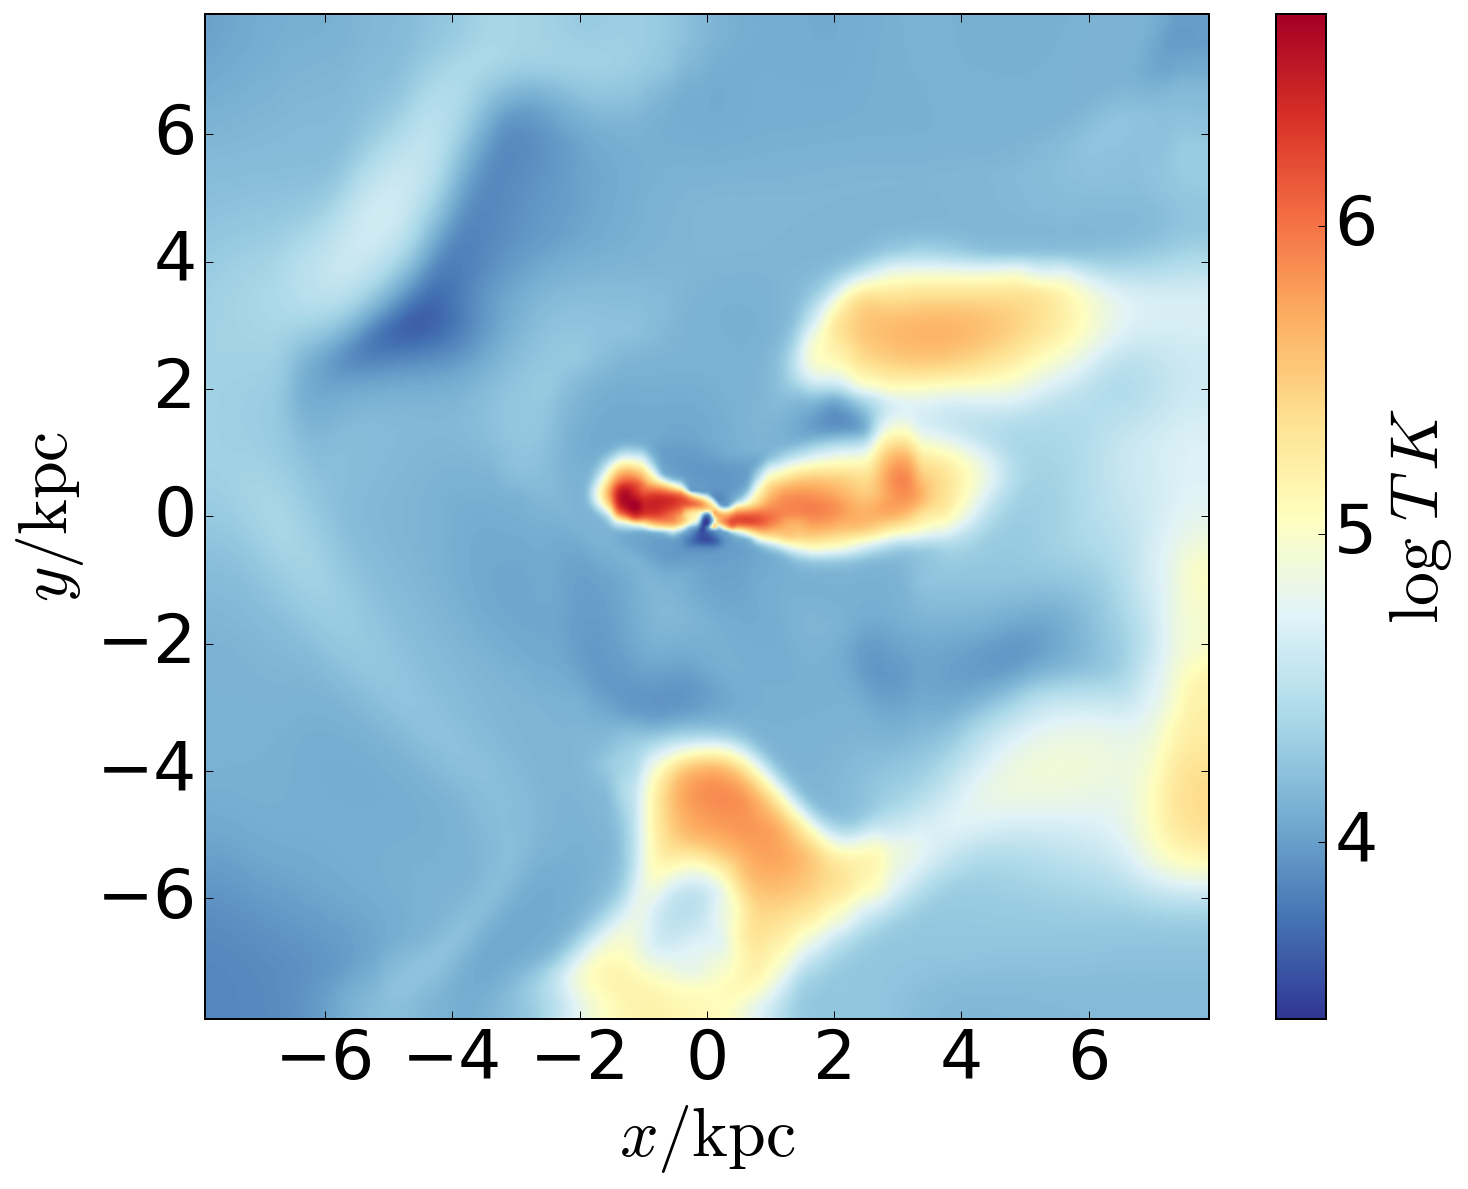

In [13]:
coords= [-rx,-ry,-rz] # Translation requires negative of the coord
with pynbody.transformation.translate(impData,coords):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    fileOut = "img_log_ax_T-z=%.1lf-%i.pdf"% (z,i)
    im = sph.image(impData.g,qty="temp",width=smallbox,cmap="RdYlBu_r", denoise=True ,av_z=False, #ret_im=True,
                   log=True, subplot=ax, approximate_fast=False,qtytitle=r"${\rm log}\; T\, K$"
                   ,show_cbar=True
                  ); #vmin=0.006, vmax=1.0,
    #cbar = fig.colorbar(im)
    #plt.colorbar(im,format=custom_formatter)
    plt.savefig(fileOut,dpi=fig.dpi,bbox_inches='tight') 
    plt.show()

In [21]:
print(impData.g['vel'].max())

360.268180242


In [47]:
hiVel = impData[pynbody.filt.BandPass('vel','200 km s**-1','500 km s**-1')]

In [51]:
hiVel['vel'].max()

SimArray(360.2681802424559, 'km s**-1')

In [69]:
print(np.sqrt(impData.g['vx']**2+impData.g['vy']**2).max())
print(np.sqrt(impData.g['vx']**2+impData.g['vy']**2+impData.g['vz']**2).max())

538.594292271
624.44735069


$v_{t}$ @ z = 8.0
Thin slice @ [0.88, -215.56, -143.27]


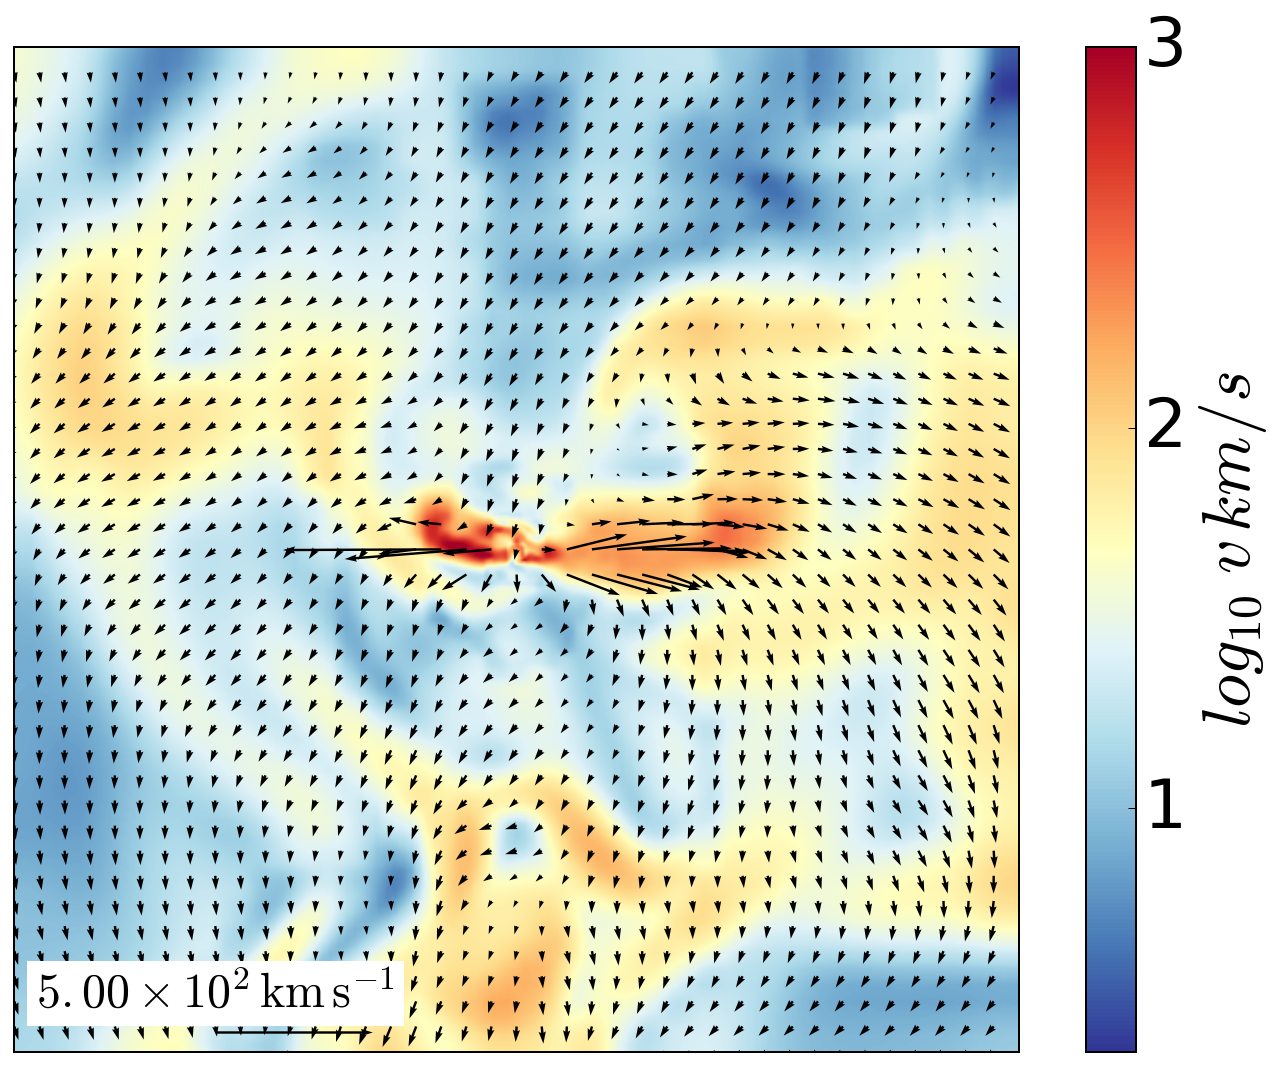

In [72]:
coords= [-rx,-ry,-rz] # Translation requires negative of the coord
with pynbody.transformation.translate(impData,coords):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    fileOut="img_vt-z=%.1lf-%i_withLegend.pdf"% (z,i)
    titleStr = "$v_{t}$ @ z = %.1f" % z + "\nThin slice @ %s" % str(coords)
    print(titleStr)
    pynbody.plot.sph.velocity_image(impData.g, qty="tv", width=smallbox, cmap = "RdYlBu_r", 
                    mode='quiver', key_color='black',qtytitle="$log_{10}\; v\, km/s$",quiverkey_bg_color='w',
                    key_x=0.2, key_y=0.02,key_length="500 km s**-1",
                    density = 1.0, vector_resolution=40, vmax=1e3,subplot=ax,
                    show_cbar=True, vector_color='black')
    plt.show()
    plt.savefig(fileOut)  # Needed since filename=fileOut doesn't include the vel vecs
#    plt.close(fig)

$v_{t}$ @ z = 8.0
Thin slice @ [0.88, -215.56, -143.27]


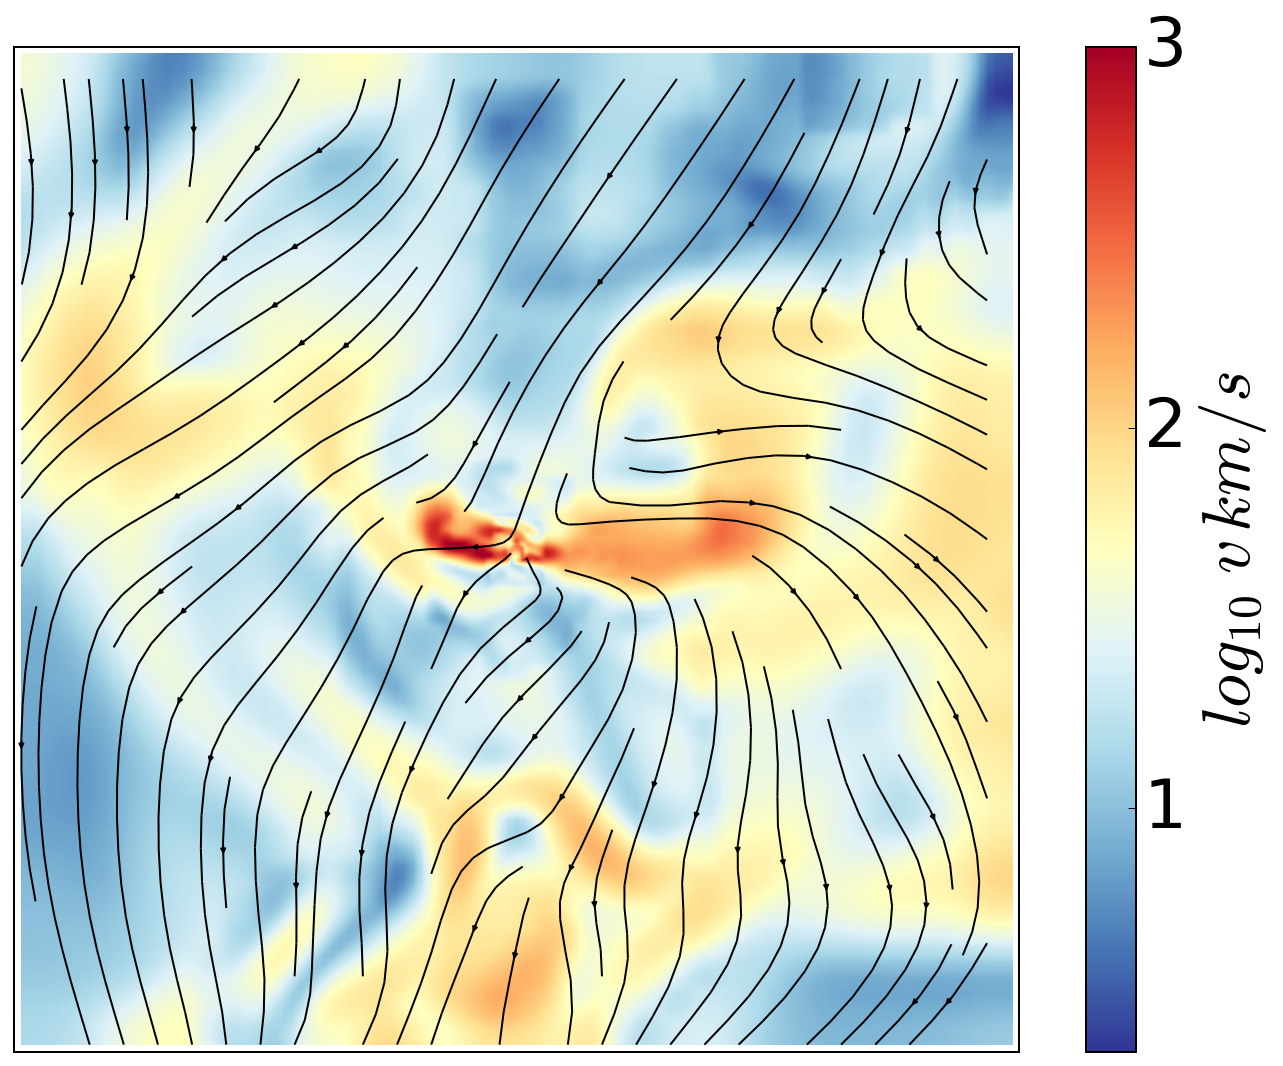

In [73]:
coords= [-rx,-ry,-rz] # Translation requires negative of the coord
with pynbody.transformation.translate(impData,coords):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    fileOut="img_vt-z=%.1lf-%i_withLegend.pdf"% (z,i)
    titleStr = "$v_{t}$ @ z = %.1f" % z + "\nThin slice @ %s" % str(coords)
    print(titleStr)
    pynbody.plot.sph.velocity_image(impData.g, qty="tv", width=smallbox, cmap = "RdYlBu_r", 
                    mode='stream', key_color='black',qtytitle="$log_{10}\; v\, km/s$",#quiverkey_bg_color='w',
                    #key_x=0.2, key_y=0.02,key_length="400 km s**-1",
                    density = 1.0, vector_resolution=40, vmax=1e3,subplot=ax,
                    show_cbar=True, vector_color='black')
    plt.show()
#    plt.savefig(fileOut)  # Needed since filename=fileOut doesn't include the vel vecs
#    plt.close(fig)

$v_{t}$ @ z = 8.0
Thin slice @ [0.88, -215.56, -143.27]


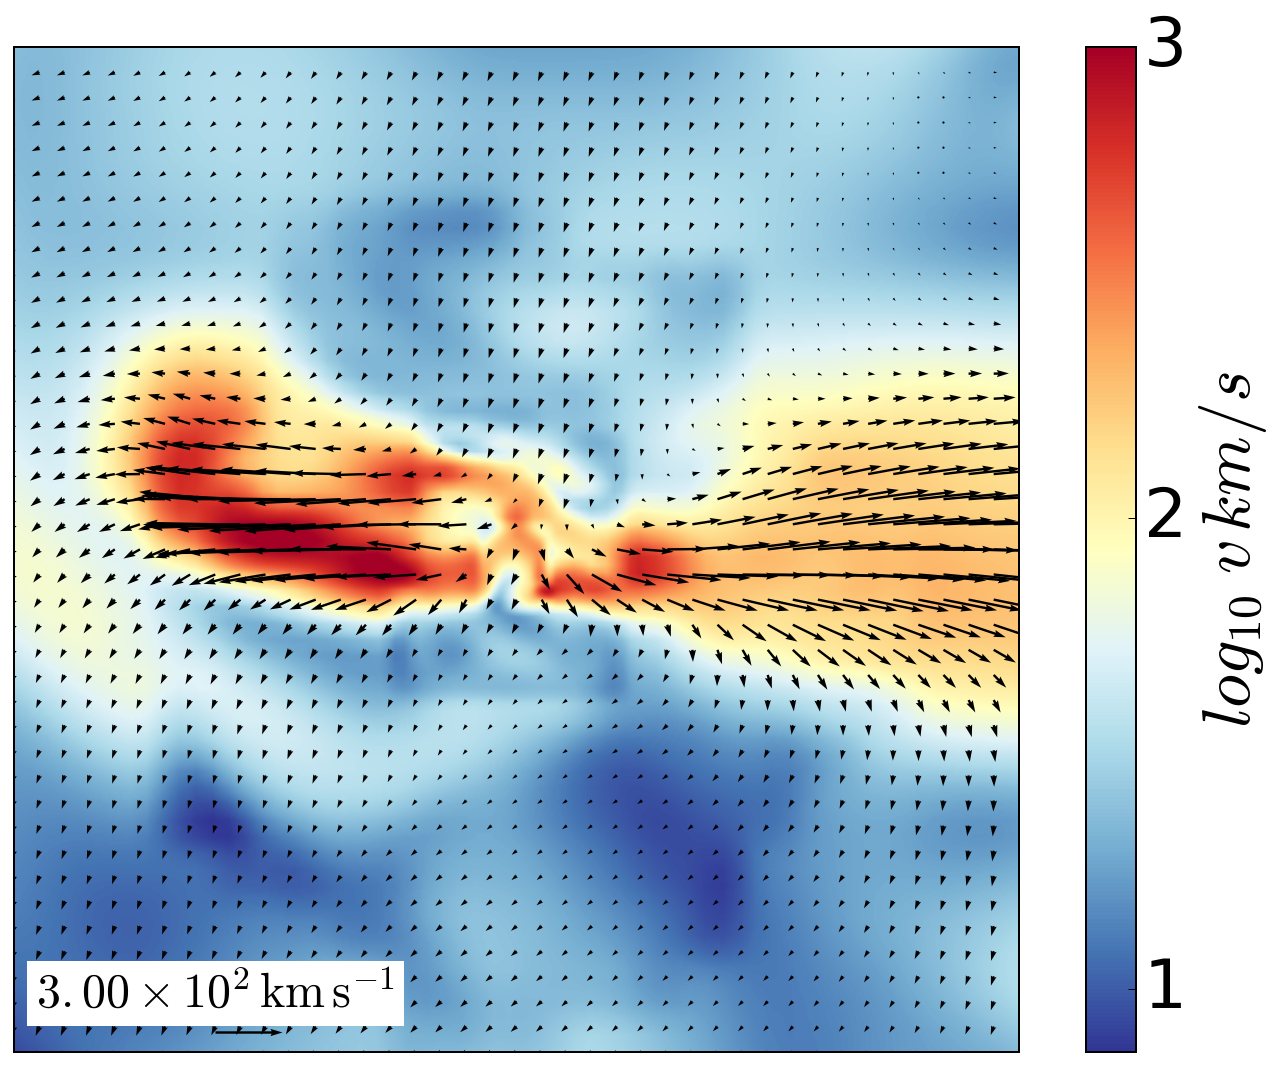

In [76]:
coords= [-rx,-ry,-rz] # Translation requires negative of the coord
with pynbody.transformation.translate(impData,coords):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    fileOut="img_vt-z=%.1lf-%i_withLegend.pdf"% (z,i)
    titleStr = "$v_{t}$ @ z = %.1f" % z + "\nThin slice @ %s" % str(coords)
    print(titleStr)
    pynbody.plot.sph.velocity_image(impData.g, qty="tv", width='4.0 kpc', cmap = "RdYlBu_r", 
                    mode='quiver', key_color='black',qtytitle="$log_{10}\; v\, km/s$",quiverkey_bg_color='w',
                    key_x=0.2, key_y=0.02,key_length="300 km s**-1",
                    density = 1.0, vector_resolution=40, vmax=1e3,subplot=ax,
                    show_cbar=True, vector_color='black')
    plt.show()
#    plt.savefig(fileOut)  # Needed since filename=fileOut doesn't include the vel vecs
#    plt.close(fig)

# Next

In [15]:
del(s)
gc.collect()

19868

In [16]:
gc.collect()

0

In [17]:
s = pynbody.load('output_00121')
s['pos']
s['pos'] -= 0.5
s.physical_units();

/Users/earnric/anaconda/lib/python3.4/site-packages/pynbody/snapshot/ramses.py:521: UserWarning: Using field 'tform' to distinguish stars. If this is wrong, try editing your config.ini, section [ramses], entry particle-distinguisher.
  warnings.warn("Using field %s to distinguish stars. If this is wrong, try editing your config.ini, section [ramses], entry particle-distinguisher."%pb_name)


In [18]:
z = 1/s.properties['a']-1
print ("Redshift =",z)
boxsizestring = "%.2f" % s.properties['boxsize'].in_units('kpc')
boxsizestring += " kpc"
print (boxsizestring)

Redshift = 7.999933327855002
468.62 kpc


In [ ]:
sbox = 40.0 / (1.0 + z) * 0.71 # 40 kpc comoving box
smallbox = str(sbox) + " kpc"
print(smallbox)

3.1555789321351235 kpc


In [ ]:
s.g['metal'][s.g['metal']<1e-7]    = 1e-10 # Since we divide by Z below, don't use 0.0
#s2.g['pgf'][s2.g['pgf']>(1.0-1e-10)]  = 1.0
s.g['pzf'][s.g['pzf']<1e-7]        = 1e-10
s.g['zsolar']  = s.g['metal'] * 50.0         # Solar units
s.g['pzsolar'] = s.g['pzf'] * 50.0          # Solar units

#s2.s['metal'][s2.s['metal']<1e-10]    = 1e-10
#s2.s['ppf'][s2.s['ppf']>(1.0-1e-10)]  = 1.0
#s2.s['pzf'][s2.s['pzf']<1e-10]        = 1e-10
#s2.s['zsolar']  = s2.s['metal'] * 50.0         # Solar units
#s2.s['pzsolar'] = s2.s['pzf'] * 50.0          # Solar units

In [10]:
gc.collect()

0

In [11]:
# z=8, i=0 : -121.77, -104.01, -203.10
# z=8, i=265793 : -0.88, 215.56, 143.27
# z=8, i=531586 : 77.55, 54.08, 218.96
# z=8, i=797379 : 137.45, -200.82, -220.27

rx,ry,rz = -121.77, -104.01, -203.10
i=0
print(rx,ry,rz)
impData = s[pynbody.filt.Cuboid(str((rx-sbox/2.0)) + " kpc", str((ry-sbox/2.0)) + " kpc",str((rz-sbox/4.0)) + " kpc",
                                str((rx+sbox/2.0)) + " kpc", str((ry+sbox/2.0)) + " kpc",str((rz+sbox/4.0)) + " kpc")]
print(z,i)

-121.77 -104.01 -203.1
7.999933327855002 0


In [12]:
coords= [-rx,-ry,-rz] # Translation requires negative of the coord
with pynbody.transformation.translate(impData,coords):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    #ax.set_xlabel(fontsize=40)
    fileOut="img_log_ax_Z-z=%.1lf-%i.pdf"% (z,i)
    titleStr = "$Z_{\odot}$ - z = %.1lf" % z# + "\n[%.2lf %.2lf %.2lf]"%(rx,ry,rz)
    print (titleStr)
    sph.image(impData.g,qty="zsolar",width=smallbox,cmap="nipy_spectral", denoise=True ,av_z=False, subplot=ax,
                      log=True, vmax=1.0, vmin=1e-7, qtytitle="$log_{10}\; Z_{\odot}$", approximate_fast=False
                      ); #vmin=0.006, vmax=1.0,
    ax.set_xticks([-0.7, 0, 0.7])
    ax.set_xticklabels(['-0.7','0','0.7'])
    plt.savefig(fileOut)
    plt.close(fig)
            
    fig = plt.figure()
    ax = fig.add_subplot(111)
    fileOut="img_log_ax_PGF-z=%.1lf-%i.pdf"% (z,i)
    titleStr = "PGF - z = %.1lf" % z# + "\n[%.2lf %.2lf %.2lf]"%(rx,ry,rz)
    print (titleStr)
    sph.image(impData.g,qty="pgf",width=smallbox,cmap="nipy_spectral", denoise=True ,av_z=False,subplot=ax,
                      log=True, vmax = 1.0, vmin=1e-7, qtytitle="$log_{10}\; PGF$",approximate_fast=False
                      ); #vmin=0.006, vmax=1.0,
    ax.set_xticks([-0.7, 0, 0.7])
    ax.set_xticklabels(['-0.7','0','0.7'])
    ax.set_yticks([-0.7, 0, 0.7])
    ax.set_yticklabels(['-0.7','0','0.7'])
    plt.savefig(fileOut)
    plt.close(fig)
            
    fig = plt.figure()
    ax = fig.add_subplot(111)
    fileOut="img_log_ax_PZ-z=%.1lf-%i.pdf"% (z,i)
    titleStr = "$Z_{P, \odot}$ - z = %.1lf" % z# + "\n[%.2lf %.2lf %.2lf]"%(rx,ry,rz)
    print (titleStr)
    sph.image(impData.g,qty="pzsolar",width=smallbox,cmap="nipy_spectral", denoise=True ,av_z=False,subplot=ax,
                      log=True, vmax=1.0, vmin=1e-7, qtytitle="$log_{10}\; Z_{P,\odot}$", approximate_fast=False
                      ); #vmin=0.006, vmax=1.0,
            
    ax.set_xticks([-0.7, 0, 0.7])
    ax.set_xticklabels(['-0.7','0','0.7'])
    plt.savefig(fileOut)
    plt.close(fig)

#     fig = plt.figure()
#     ax = fig.add_subplot(111)
#     fileOut="img_log_ax_Density-z=%.1lf-%i.pdf"% (z,i)
#     titleStr = "Density - z = %.1lf" % z# + "\n[%.2lf %.2lf %.2lf]"%(rx,ry,rz)
#     print (titleStr)
#     sph.image(impData.g,qty="rho",width=smallbox,cmap="terrain", denoise=True ,av_z=False,
#                       log=True, approximate_fast=False,subplot=ax,qtytitle="$log_{10}\; M_{\odot}/kpc^{3}$"
#                       ); #vmin=0.006, vmax=1.0,
#     ax.set_yticks([-0.7, 0,0.7])
#     ax.set_yticklabels(['-0.7','0','0.7'])
#     plt.savefig(fileOut)
#     plt.close(fig)
            
    fig = plt.figure()
    ax = fig.add_subplot(111)
    fileOut="img_log_ax_Temp-z=%.1lf-%i.pdf"% (z,i)
    titleStr = "Temp - z = %.1lf" % z# + "\n[%.2lf %.2lf %.2lf]"%(rx,ry,rz)
    print (titleStr)
    sph.image(impData.g,qty="temp",width=smallbox,cmap="RdYlBu_r", denoise=True ,av_z=False,
                      log=True, approximate_fast=False,subplot=ax,qtytitle="$log_{10}\; Temp\, [K]$"
                      ); #vmin=0.006, vmax=1.0,
    plt.savefig(fileOut)  # Needed since filename=fileOut doesn't include the vel vecs
    plt.close(fig)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    fileOut="img_log_ax_vt-z=%.1lf-%i.pdf"% (z,i)
    titleStr = "$v_{t}$ @ z = %.1f" % z + "\nThin slice @ %s" % str(coords)
    print(titleStr)
    sph.velocity_image(impData.g, qty="tv", width=smallbox, cmap = "gist_ncar", 
                    mode='quiver', key_color='black',qtytitle="$log_{10}\; v\, km/s$",
                       key_x=0.2, key_y=0.1,quiverkey_bg_color='w',
                   density = 1.0, vector_resolution=40, vmax=1e3,subplot=ax,
                   show_cbar=True, vector_color='black')
    plt.savefig(fileOut)  # Needed since filename=fileOut doesn't include the vel vecs
    plt.close(fig)

INFO:pynbody.sph:Rendering image on 32 threads...
INFO:pynbody.snapshot:Deriving array mass
INFO:pynbody.sph:Rendering image on 32 threads...


$Z_{\odot}$ - z = 8.0
PGF - z = 8.0

INFO:pynbody.sph:Rendering image on 32 threads...
INFO:pynbody.sph:Rendering image on 32 threads...



$Z_{P, \odot}$ - z = 8.0

INFO:pynbody.sph:Rendering image on 32 threads...
INFO:pynbody.sph:Rendering image on 32 threads...



Density - z = 8.0

INFO:pynbody.sph:Rendering image on 32 threads...
INFO:pynbody.sph:Rendering image on 32 threads...



Temp - z = 8.0

INFO:pynbody.sph:Rendering image on 32 threads...
INFO:pynbody.snapshot:Deriving array temp
INFO:pynbody.sph:Rendering image on 32 threads...



$v_{t}$ @ z = 8.0
Thin slice @ [121.77, 104.01, 203.1]

INFO:pynbody.sph:Rendering image on 32 threads...
INFO:pynbody.sph:Rendering image on 32 threads...
INFO:pynbody.sph:Rendering image on 32 threads...
INFO:pynbody.sph:Rendering image on 32 threads...
INFO:pynbody.sph:Rendering image on 32 threads...
INFO:pynbody.sph:Rendering image on 32 threads...


In [ ]:
from mpl_toolkits.axes_grid.anchored_artists import AnchoredDrawingArea
from mpl_toolkits.axes_grid.anchored_artists import AnchoredAuxTransformBox
from matplotlib.patches import Rectangle, Ellipse

rect = [0.15,0.15,0.85,0.9]
coords= [-rx,-ry,-rz] # Translation requires negative of the coord

with pynbody.transformation.translate(impData,coords):

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.xaxis.set_visible(False)
    fileOut = "img_log_ax_Density-z=%.1lf-%i_withBox3.pdf"% (z,i)
    titleStr = "Density - z = %.1lf" % z# + "\n[%.2lf %.2lf %.2lf]"%(rx,ry,rz)
    print (titleStr)
    sph.image(impData.g,qty="rho",width=smallbox,cmap="terrain", denoise=True ,av_z=False, units="m_p cm^-3",
                      log=True, approximate_fast=False, vmin=10**-4.5, vmax=10**2.0,
                      subplot=ax,qtytitle=r"${\rm log}\,m_{\rm p}/{\rm cm}^{3}$"); 
    ax.set_yticks([-tic, 0,tic])

    currentAxis = plt.gca()
    currentAxis.add_patch(Rectangle((-.7535, -.7535), 1.578, 1.578, facecolor="grey", alpha=0.35))
    bbox = {'facecolor':'white', 'alpha':0.05, 'pad':3}
    ax.annotate("Star forming region",xy=( -.7535,0.0),
                arrowprops=dict(arrowstyle="->", facecolor='black', shrinkB=5,connectionstyle="arc3,rad=-0.2"), 
                xytext=(-4,-3.), horizontalalignment='center', verticalalignment="center", bbox=bbox, size=24)

    
    plt.savefig(fileOut,dpi=fig.dpi,bbox_inches='tight')
    plt.show()
    #plt.close(fig)


In [ ]:
coords= [-rx,-ry,-rz] # Translation requires negative of the coord
with pynbody.transformation.translate(impData,coords):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.yaxis.set_visible(False)
    #ax.set_xlabel(fontsize=40)
    fileOut="img_log_Z-z=%.1lf-%i.pdf"% (z,i)
    titleStr = "$Z_{\odot}$ - z = %.1lf" % z# + "\n[%.2lf %.2lf %.2lf]"%(rx,ry,rz)
    print (titleStr)
    sph.image(impData.g,qty="zsolar",width=smallbox,cmap="nipy_spectral", denoise=True ,av_z=False, subplot=ax,
                      log=True, vmax=1.0, vmin=1e-7, qtytitle="$log_{10}\; Z_{\odot}$", approximate_fast=False
                      ); #vmin=0.006, vmax=1.0,
    ax.set_xticks([-0.7, 0, 0.7])
    ax.set_xticklabels(['-0.7','0','0.7'])
    plt.savefig(fileOut)
    plt.close(fig)
            
    fig = plt.figure()
    ax = fig.add_subplot(111)
    fileOut="img_log_PGF-z=%.1lf-%i.pdf"% (z,i)
    titleStr = "PGF - z = %.1lf" % z# + "\n[%.2lf %.2lf %.2lf]"%(rx,ry,rz)
    print (titleStr)
    sph.image(impData.g,qty="pgf",width=smallbox,cmap="nipy_spectral", denoise=True ,av_z=False,subplot=ax,
                      log=True, vmax = 1.0, vmin=1e-7, qtytitle="$log_{10}\; PGF$",approximate_fast=False
                      ); #vmin=0.006, vmax=1.0,
    ax.set_xticks([-0.7, 0, 0.7])
    ax.set_xticklabels(['-0.7','0','0.7'])
    ax.set_yticks([-0.7, 0, 0.7])
    ax.set_yticklabels(['-0.7','0','0.7'])
    plt.savefig(fileOut)
    plt.close(fig)
            
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.yaxis.set_visible(False)
    fileOut="img_log_PZ-z=%.1lf-%i.pdf"% (z,i)
    titleStr = "$Z_{P, \odot}$ - z = %.1lf" % z# + "\n[%.2lf %.2lf %.2lf]"%(rx,ry,rz)
    print (titleStr)
    sph.image(impData.g,qty="pzsolar",width=smallbox,cmap="nipy_spectral", denoise=True ,av_z=False,subplot=ax,
                      log=True, vmax=1.0, vmin=1e-7, qtytitle="$log_{10}\; Z_{P,\odot}$", approximate_fast=False
                      ); #vmin=0.006, vmax=1.0,
            
    ax.set_xticks([-0.7, 0, 0.7])
    ax.set_xticklabels(['-0.7','0','0.7'])
    plt.savefig(fileOut)
    plt.close(fig)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.xaxis.set_visible(False)
    fileOut="img_log_Density-z=%.1lf-%i.pdf"% (z,i)
    titleStr = "Density - z = %.1lf" % z# + "\n[%.2lf %.2lf %.2lf]"%(rx,ry,rz)
    print (titleStr)
    sph.image(impData.g,qty="rho",width=smallbox,cmap="terrain", denoise=True ,av_z=False,
                      log=True, approximate_fast=False,subplot=ax,qtytitle="$log_{10}\; M_{\odot}/kpc^{3}$"
                      ); #vmin=0.006, vmax=1.0,
    ax.set_yticks([-0.7, 0,0.7])
    ax.set_yticklabels(['-0.7','0','0.7'])
    plt.savefig(fileOut)
    plt.close(fig)
            
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    fileOut="img_log_Temp-z=%.1lf-%i.pdf"% (z,i)
    titleStr = "Temp - z = %.1lf" % z# + "\n[%.2lf %.2lf %.2lf]"%(rx,ry,rz)
    print (titleStr)
    sph.image(impData.g,qty="temp",width=smallbox,cmap="RdYlBu_r", denoise=True ,av_z=False,
                      log=True, approximate_fast=False,subplot=ax,qtytitle="$log_{10}\; Temp\, [K]$"
                      ); #vmin=0.006, vmax=1.0,
    plt.savefig(fileOut)  # Needed since filename=fileOut doesn't include the vel vecs
    plt.close(fig)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    fileOut="img_log_vt-z=%.1lf-%i.pdf"% (z,i)
    titleStr = "$v_{t}$ @ z = %.1f" % z + "\nThin slice @ %s" % str(coords)
    print(titleStr)
    sph.velocity_image(impData.g, qty="tv", width=smallbox, cmap = "gist_ncar", 
                    mode='quiver', key_color='black',qtytitle="$log_{10}\; v\, km/s$",
                       key_x=0.2, key_y=0.1,quiverkey_bg_color='w',
                   density = 1.0, vector_resolution=40, vmax=1e3,subplot=ax,
                   show_cbar=True, vector_color='black')
    plt.savefig(fileOut)  # Needed since filename=fileOut doesn't include the vel vecs
    plt.close(fig)

In [ ]:
coords= [-rx,-ry,-rz] # Translation requires negative of the coord
with pynbody.transformation.translate(impData,coords):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    fileOut="img_vt-z=%.1lf-%i.pdf"% (z,i)
    titleStr = "$v_{t}$ @ z = %.1f" % z + "\nThin slice @ %s" % str(coords)
    print(titleStr)
    vi = pynbody.plot.sph.velocity_image(impData.g, qty="tv", width=smallbox, cmap = "gist_ncar", 
                    mode='quiver', key_color='black',qtytitle="$v\, km/s$",
                       key_x=0.2, key_y=0.1,quiverkey_bg_color='w',
                   density = 1.0, vector_resolution=40, vmax=1e3,subplot=ax,
                   show_cbar=True, vector_color='black')
    plt.show()

#    plt.savefig(fileOut)  # Needed since filename=fileOut doesn't include the vel vecs
#    plt.close(fig)

In [ ]:
coords= [-rx,-ry,-rz] # Translation requires negative of the coord
with pynbody.transformation.translate(impData,coords):
    sph.image(impData.g,qty="temp",width=smallbox,cmap="RdYlBu_r", denoise=True ,av_z=False,
                      log=True, approximate_fast=False,qtytitle="$log_{10}\; Temp\, [K]$"
                      ); #vmin=0.006, vmax=1.0,



In [ ]:
from matplotlib.ticker import LogFormatterExponent # RS
from matplotlib.ticker import ScalarFormatter # RS